<a href="https://colab.research.google.com/github/SoumyadeepB/Machine-Learning/blob/master/Clustering/K-Means/Image_Compression_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression using K-Means

Image compression is a type of data compression applied to digital images, to reduce their cost for storage or transmission. Algorithms may take advantage of visual perception and the statistical properties of image data to provide superior results compared with generic data compression methods which are used for other digital data.


We will be use the **K-Means Clustering** technique for image compression which is a type of Transform method of compression. Using K-means clustering, we will perform quantization of colors present in the image which will further help in compressing the image.

### Idea:

k-Means Clustering algorithm takes advantage of the visual perception of the human eye and uses fewer colors to represent an image. The K-Means algorithm takes advantage of the visual similarity (to the human eye) of different color intensities and combines similar colors in a cluster.

In [1]:
import requests
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans

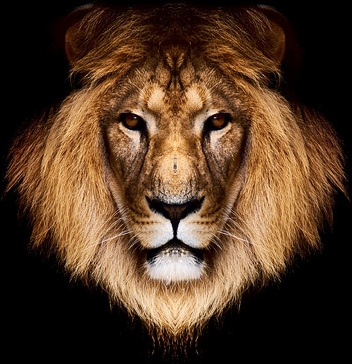

In [2]:
url = "https://images.all-free-download.com/images/graphiclarge/lion_head_picture_168830.jpg"
img = Image.open(requests.get(url, stream=True).raw)
display(img)

### Get the Dimensions and Size of the original image

In [3]:
image = np.array(img)
rows,cols,channels = image.shape
print(f"Rows={rows} || Cols={cols} || Channels={channels}")

Rows=364 || Cols=352 || Channels=3


### Flatten the image

In [4]:
image = image.reshape(-1, channels)
print(f"Flattened image shape: {image.shape}")

Flattened image shape: (128128, 3)


### Define Cluster sizes to be explored

In [5]:
clusters = [2,4,8,16,32,64,128]

### Perform Clustering and visualize the results for each cluster size


 ******************* K = 2 *******************


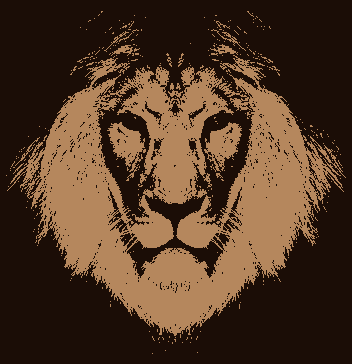


 ******************* K = 4 *******************


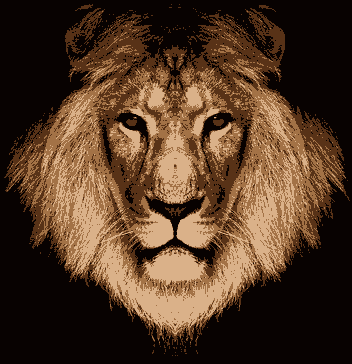


 ******************* K = 8 *******************


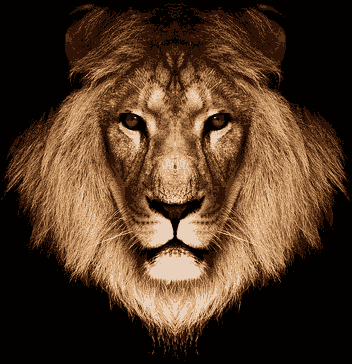


 ******************* K = 16 *******************


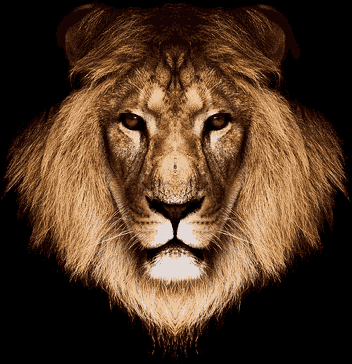


 ******************* K = 32 *******************


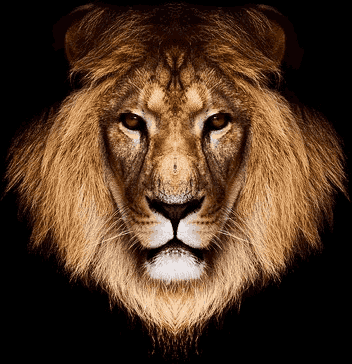


 ******************* K = 64 *******************


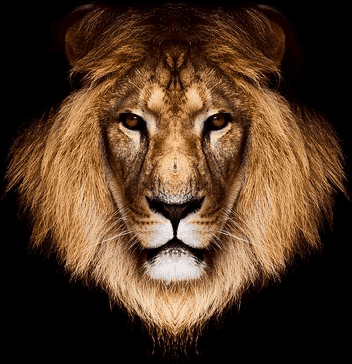


 ******************* K = 128 *******************


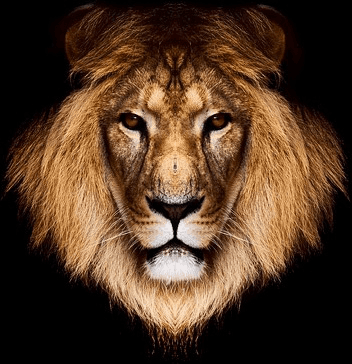

In [6]:
for k in clusters:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(image)
  #Replace each pixel value with its nearest centroid
  '''
  kmeans.labels_ : contains the labels for each of the pixels in the flattened image
  kmeans.cluster_centers_ : contains the cluster-centroid for each of the k labels
  '''
  compressed_image = kmeans.cluster_centers_[kmeans.labels_]
  # Extend the range of the pixel values to the original range
  compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
  #Reshape the image to original dimension
  compressed_image = compressed_image.reshape(rows, cols, 3)
  print(f"\n ******************* K = {k} *******************")
  compressed_image = Image.fromarray(compressed_image)  
  display(compressed_image)
  
